### BreastCancerClassifier
This notebook is a showcase of common classification methods use breast cancer data as an example. The Wisconsin Breast Cancer Database was studied by Dr. Wolberg in 1991. There are total 699 instances and 10 attributes plus class attribute. Attributes include
1. Sample code number (id number)
2. Clump Thickness (1 - 10)
3. Uniformity of Cell Size (1 - 10)
4. Uniformity of Cell Shape (1 - 10)
5. Marginal Adhesion (1 - 10)
6. Single Epithelial Cell Size (1 - 10)
7. Bare Nuclei (1 - 10)
8. Bland Chromatin (1 - 10)
9. Normal Nucleoli (1 - 10)
10. Mitoses (1 - 10)
11. Class: (2 for benign, 4 for malignant)

#### Model
###### 1. Scikit-Learn:
SVC (with linear and rgb kernal), Decission Tree, Random Forest Classifier, Logistic Regression, Extra Trees Classifier, Gradient Boosting Classifier, Neuron Network, KNN Classifier, Gaussian Process Classifier, Logistic Regression, Linear Discriminant Analysis and Ada Boost Classifier. 
As well as ensemble methods such as voting classifier, ensemble tree (logistic regression+ random forest, logistic regression + gradient boosting)
###### 2. XGBoost Classifier
###### 3. Light GBM Classifier
###### 4. Deep Learning via Keras and Tensor flow:
Three fully connected hidden layers with (32,16,8) mixes with linear, relu and sigmoid activation function.


#### Table of Content
[1.1 General Classifier](#general)

[1.1.1 Cross Validation](#CV_general)

[1.1.2 Prediction](#Pred_general)
 
[1.1.3 ROC Curve](#ROC_general)

[1.1.4 Learning Curve](#LR_general)

[1.2.1 Ensemble:Voting](#voting)

[1.3.1 Ensemble:Tree](#ensemble_tree)

[2.1 Xgboost](#xgboost)

[3.1 LightGBM](#lightgbm)

[4.1 DeepLearning:TensorFlow and Keras](#tf)

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as gbm
from lightgbm import LGBMClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold, learning_curve, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data/breastCancer.csv')

#### Overview
699 entries, 10 columns
#### columns summary
- id : unique id
- feature : numerical rating from 1-10 ['clump_thickness', 'size_uniformity', 'shape_uniformity','marginal_adhesion', 'epithelial_size', 'bare_nucleoli','bland_chromatin', 'normal_nucleoli', 'mitoses']
- class : {2:benign, 4:malignant}

In [3]:
##fillna
bn_mean = np.floor(np.mean(np.int64(data.bare_nucleoli[data.bare_nucleoli!="?"])))
data.replace('?', bn_mean, inplace=True)
data = data.applymap(np.float64)

In [4]:
feature_cols = ['clump_thickness', 'size_uniformity', 'shape_uniformity','marginal_adhesion', 'epithelial_size', 'bare_nucleoli','bland_chromatin', 'normal_nucleoli', 'mitoses']
classes = {2:0,4:1}
data['binary_class'] = data['class'].map(classes)
X = data[feature_cols].values
Y = data['binary_class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### General Scikit-Learn Methods
<a id='general'></a>

In [5]:
scaler = StandardScaler()
kfold = StratifiedKFold(n_splits=10)
random_state = 2
MLP_params = {'hidden_layer_sizes':(20,),'solver': 'adam', 'learning_rate_init': 0.01,'max_iter':1000}
classifiers = []
classifiers.append(SVC(kernel="linear", C=0.025,probability=True,random_state=random_state)) #predict_proba available when probability=True
classifiers.append(SVC(gamma=2, C=1,probability=True,random_state=random_state))#predict_proba
classifiers.append(DecisionTreeClassifier(random_state=random_state)) #predict_proba
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state)) #predict_proba
classifiers.append(ExtraTreesClassifier(random_state=random_state)) #predict_proba
classifiers.append(GradientBoostingClassifier(random_state=random_state)) #predict_proba
classifiers.append(MLPClassifier(random_state=random_state,**MLP_params)) #predict_proba
classifiers.append(KNeighborsClassifier()) #predict_proba
classifiers.append(LogisticRegression(random_state = random_state)) #predict_proba
classifiers.append(LinearDiscriminantAnalysis()) #predict_proba
classifiers.append(GaussianProcessClassifier(1.0 * RBF(1.0))) #predict_proba
start = time.time()
cv_results = []
for classifier in classifiers :
    c_start = time.time()
    print (classifier)
    cv_results.append(cross_val_score(classifier, scaler.fit_transform(X_train), y = Y_train, scoring = 'f1', cv = kfold, n_jobs=-1))
    c_time = time.time()-c_start
    print ('time: {:f}'.format(c_time))
tot_time = time.time()-start
print ('total_time: {:f}'.format(tot_time))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
time: 0.304640
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)
time: 0.326612
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
time: 0.344568
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=No

#### Cross-Validation
<a id='CV_general'></a>
Use F1 score to evalute score, the top 5 methods
1. SVC with linear kernal
2. KNN classifier
3. Logistic Regression
4. Gaussian Process
5. Extra Trees

In [6]:
cv_res = pd.DataFrame({"CrossValF1Means":cv_means,"CrossValerrors": cv_std,\
                       "Algorithm":["SVC_lm","SVC_rbf","DecisionTreeClassifier","AdaBoostClassifier","RandomForestClassifier",
             "ExtraTreesClassifier","GradientBoostingClassifier","MLPClassifier",'KNeighborsClassifier',
            'LogisticRegression','LinearDiscriminantAnalysis','GaussianProcessClassifier']})
cv_res.sort_values('CrossValF1Means',ascending=False).head()

,Algorithm,CrossValF1Means,CrossValerrors
0,SVC_lm,0.947290,0.045661
8,KNeighborsClassifier,0.946702,0.049542
9,LogisticRegression,0.946300,0.036937
11,GaussianProcessClassifier,0.946300,0.036937
5,ExtraTreesClassifier,0.943394,0.036131


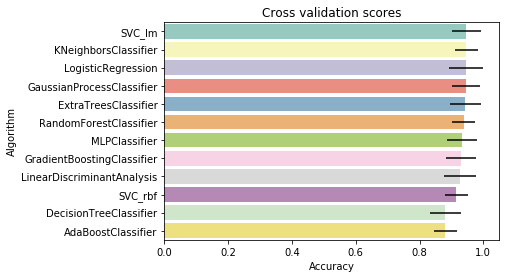

In [7]:
g = sns.barplot("CrossValF1Means","Algorithm",data = cv_res.sort_values('CrossValF1Means',ascending=False), palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Accuracy")
g = g.set_title("Cross validation scores")

#### Prediction
<a id='Pred_general'></a>
Compare the accuracy of predictions by different method. Top 5 methods are
1. SVC with linear kernal (97.8571%)
2. Random Forest 
3. Extra Trees
4. Gradient Boosting
5. Nuron Network

In [8]:
plt.figure(figsize=(12,12))
algrithm = ["SVC_lm","SVC_rgb","DecisionTreeClassifier","AdaBoostClassifier","RandomForestClassifier",
             "ExtraTreesClassifier","GradientBoostingClassifier","MLPClassifier",'KNeighborsClassifier',
            'LogisticRegression','LinearDiscriminantAnalysis','GaussianProcessClassifier']
ROCurve = dict()
cv_res["Accuracy"]=0
for n, classifier in enumerate(classifiers):
    name = algrithm[n]
    classifier.fit(scaler.transform(X_train),Y_train)
    probs = classifier.predict_proba(scaler.transform(X_test))
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    ROCurve[name]=(fpr,tpr,roc_auc)
    acc = accuracy_score(Y_test,classifier.predict(scaler.transform(X_test)))
    cv_res.loc[n,"Accuracy"] = acc
cv_res.sort_values('Accuracy',ascending=False).head()

,Algorithm,CrossValF1Means,CrossValerrors,Accuracy
0,SVC_lm,0.947290,0.045661,0.978571
4,RandomForestClassifier,0.938577,0.049179,0.978571
5,ExtraTreesClassifier,0.943394,0.036131,0.971429
6,GradientBoostingClassifier,0.930375,0.046785,0.971429
7,MLPClassifier,0.934538,0.046075,0.971429


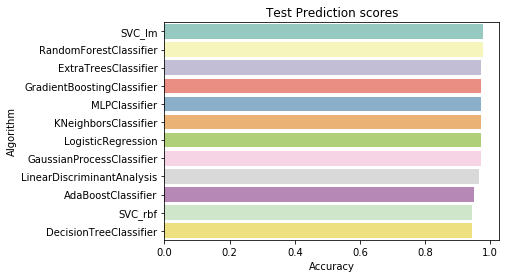

In [9]:
g = sns.barplot("Accuracy","Algorithm",data = cv_res.sort_values('Accuracy',ascending=False), palette="Set3",orient = "h")
g.set_xlabel("Accuracy")
g = g.set_title("Test Prediction scores")

#### ROC Curve
<a id='ROC_general'></a>
We want to maximize both precission and recall, not just precission. The ROC area under curve (auc) demonstrated comparision of the true positive rate and false positive between each methods. Top 5 are
1. Linear Discriminant Analysis
2. Logistic Regression
3. Gaussian Process
4. Gradien Boosting
5. SVC linear kernal

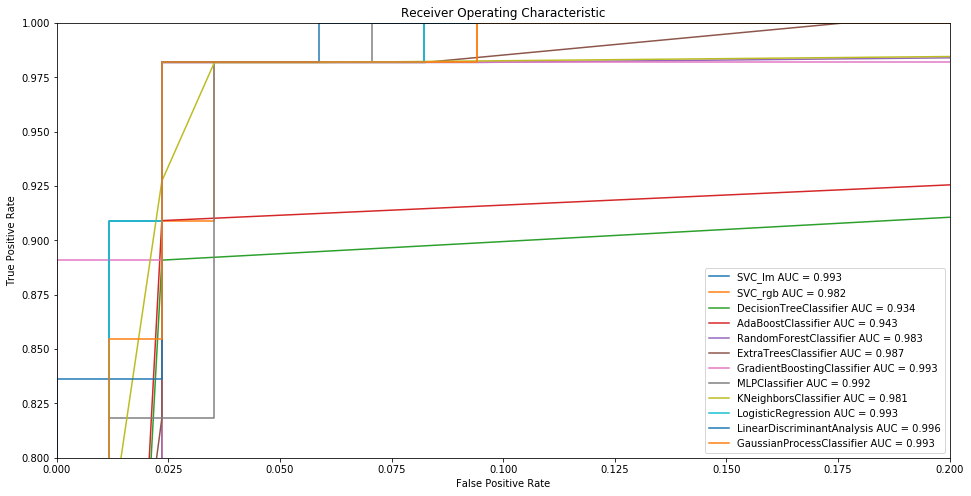

In [10]:
plt.figure(figsize=(16,8))
for C in ROCurve:
    #ROCurve[name]=(fpr,tpr,roc_auc)
    plt.plot(ROCurve[C][0], ROCurve[C][1], label = '{:s} AUC = {:.3f}'.format(str(C),ROCurve[C][2]))
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 0.2])
plt.ylim([0.8, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Learning Curve
<a id='LR_general'></a>
Some methods tend to overfitting the training sample. 
For example, SVC rgb, Decission Tree, Ada Boost, Random Forest, Extra Tree, MPL and Gradient Boosting method. For these methods, we should fine tune hyperparameters to reduce the model complexity to avoid overfit.
In the other hand, the learning curves of SVC linear, KNN, Logistic, LDA and GPC perform better without overfiting or underfiting


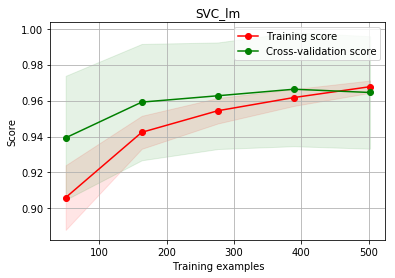

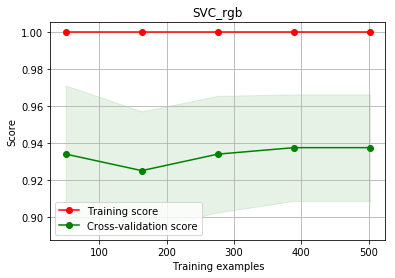

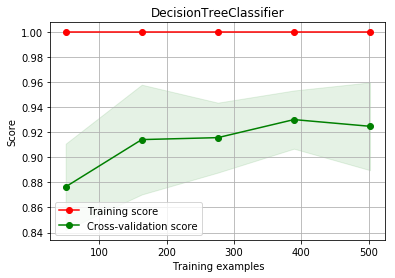

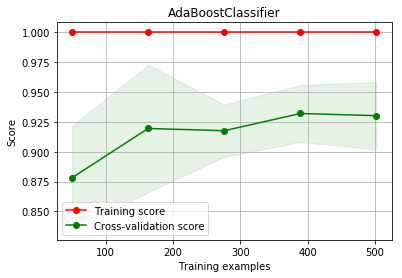

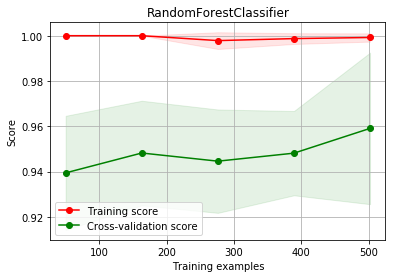

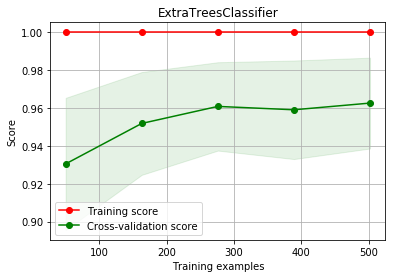

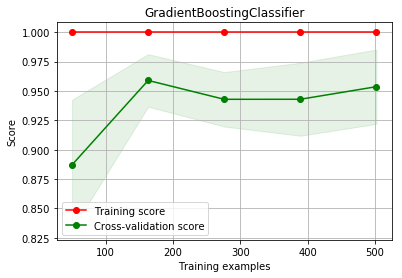

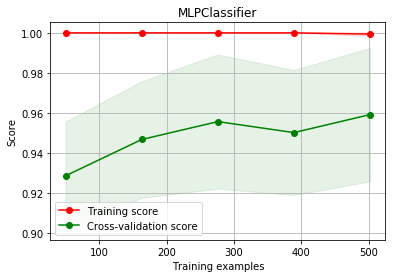

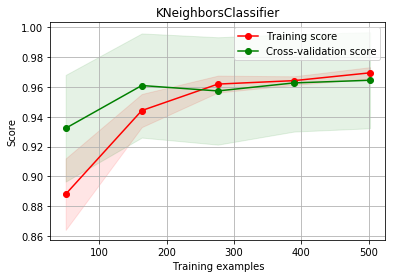

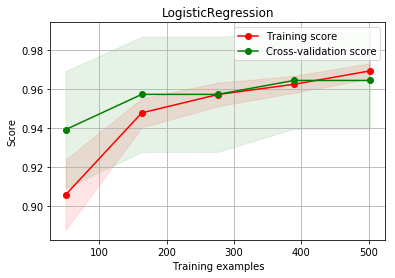

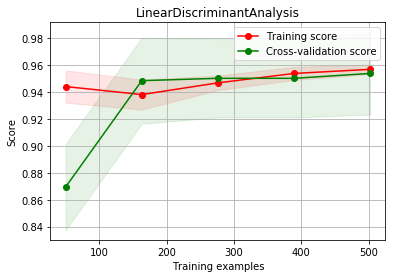

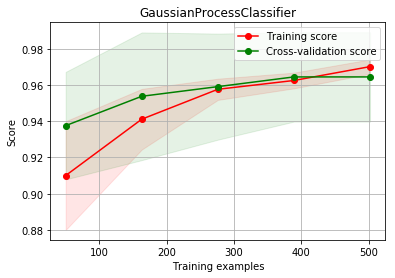

In [11]:
###Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    scaler = StandardScaler()
    kfold = StratifiedKFold(n_splits=10)
    X = scaler.fit_transform(X)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=kfold, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy', verbose = 0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    #return plt
for n, c in enumerate(algrithm):
    plot_learning_curve(classifiers[n],c,X_train,Y_train)

#### Voting Classifiers
<a id='voting'></a>

In [12]:
### Voting 
voting_estimators=["SVC_lm","RandomForestClassifier",'GaussianProcessClassifier','KNeighborsClassifier','LogisticRegression']
estimators = list()
for n,c in enumerate(algrithm):
    if c in voting_estimators:
        estimators.append((c,classifiers[n]))   
votingC = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
votingC = votingC.fit(scaler.transform(X_train), Y_train)
y_pred = votingC.predict(scaler.transform(X_test))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.86%


/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Ensemble of Trees
<a id='ensemble_tree'></a>

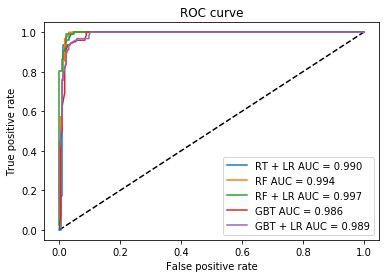

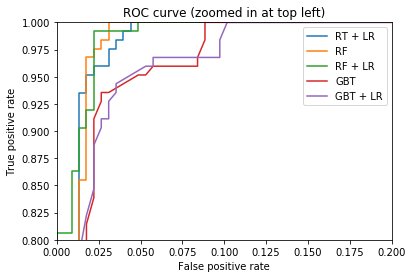

In [13]:
### Ensemble of Trees
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
n_estimator = 10
X = data[feature_cols].values
Y = data['binary_class'].values
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(X), Y, test_size=0.5)
# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)
auc_rt_lm = auc(fpr_rt_lm, tpr_rt_lm)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
auc_rf_lm = auc(fpr_rf_lm, tpr_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
auc_grd_lm = auc(fpr_grd_lm, tpr_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
auc_grd = auc(fpr_grd, tpr_grd)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
'{:s} AUC = {:.3f}'.format(str(C),ROCurve[C][2])
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR AUC = {:.3f}'.format(auc_rt_lm))
plt.plot(fpr_rf, tpr_rf, label='RF AUC = {:.3f}'.format(auc_rf))
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR AUC = {:.3f}'.format(auc_rf_lm))
plt.plot(fpr_grd, tpr_grd, label='GBT AUC = {:.3f}'.format(auc_grd))
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR AUC = {:.3f}'.format(auc_grd_lm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

#### XGBoost
<a id='xgboost'></a>

In [14]:
###xgboost
from xgboost import XGBClassifier
X = data[feature_cols].values
Y = data['binary_class'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
xgb = XGBClassifier()
xgb.fit(scaler.transform(X_train), Y_train)
y_pred = xgb.predict(scaler.transform(X_test))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.86%


/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### LightGBM
<a id='lightgbm'></a>

In [15]:
###lightGBM
from lightgbm import LGBMClassifier
gbm = LGBMClassifier()
gbm.fit(scaler.transform(X_train), Y_train)
y_pred = gbm.predict(scaler.transform(X_test))
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.14%


/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Deep Learning : TensorFlow
<a id='tf'></a>

In [16]:
###TensorFlow
DNN = Sequential()
DNN.add(Dense(32,activation='linear',input_dim=9))
DNN.add(Dense(16,activation='relu'))
DNN.add(Dense(8,activation='relu'))
DNN.add(Dense(1,activation='sigmoid'))
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
DNN.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
DNN.fit(scaler.transform(X_train), Y_train, epochs=10, batch_size=16)
y_pred = DNN.predict(scaler.transform(X_test))
predictions = [round(value) for value in y_pred[:,0]]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Epoch 1/10
559/559 [==============================] - 0s 304us/step - loss: 0.4573 - acc: 0.8533
Epoch 2/10
559/559 [==============================] - 0s 106us/step - loss: 0.1791 - acc: 0.9732
Epoch 3/10
559/559 [==============================] - 0s 91us/step - loss: 0.1003 - acc: 0.9696
Epoch 4/10
559/559 [==============================] - 0s 87us/step - loss: 0.0831 - acc: 0.9696
Epoch 5/10
559/559 [==============================] - 0s 90us/step - loss: 0.0780 - acc: 0.9696
Epoch 6/10
559/559 [==============================] - 0s 82us/step - loss: 0.0747 - acc: 0.9714
Epoch 7/10
559/559 [==============================] - 0s 88us/step - loss: 0.0721 - acc: 0.9732
Epoch 8/10
559/559 [==============================] - 0s 82us/step - loss: 0.0704 - acc: 0.9732
Epoch 9/10
559/559 [==============================] - 0s 91us/step - loss: 0.0696 - acc: 0.9732
Epoch 10/10
559/559 [==============================] - 0s 92us/step - loss: 0.0686 - acc: 0.9732
Accuracy: 97.14%
